# Importing the Libraries

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import random
from termcolor import colored

# Creating Dataset

In [2]:
n_pts = 100
centers = [[-0.5, 0.5], [0.5, -0.5]]
X, y = datasets.make_blobs(n_samples=n_pts,
                           random_state=123,
                           centers=centers,
                           cluster_std=0.4)
print(X[::10])
print(y[::10])

[[-0.13715792 -0.07147228]
 [-0.62590326  0.06563904]
 [-0.09837844  0.65447456]
 [ 0.57181979 -1.24479028]
 [ 0.164381    0.82292327]
 [ 0.66123438  0.08877175]
 [-0.93382716 -0.04538862]
 [ 0.3922826  -0.54434029]
 [ 0.76626138 -0.85936918]
 [ 0.17062744 -0.44791402]]
[0 0 0 1 0 1 0 1 1 1]


In [3]:
print(X[y == y[0], 0][0], X[y == y[0], 1][0])
print([X[y == y[0], 0][0], X[y == y[0], 1][0]] == X[0])

-0.1371579216798795 -0.07147228009038764
[ True  True]


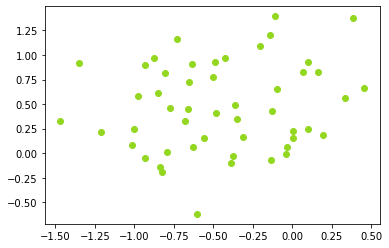

In [4]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], color=np.random.rand(3))

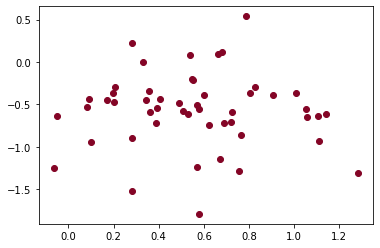

In [5]:
plt.scatter(X[y == 1, 0], X[y == 1, 1], color=np.random.rand(3))

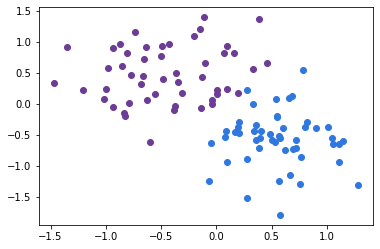

In [6]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], color=np.random.rand(3))
plt.scatter(X[y == 1, 0], X[y == 1, 1], color=np.random.rand(3))

In [7]:
X_data = torch.Tensor(X)
y_data = torch.Tensor(y)
print(X_data[::10])
print(y_data[::10])

tensor([[-0.1372, -0.0715],
        [-0.6259,  0.0656],
        [-0.0984,  0.6545],
        [ 0.5718, -1.2448],
        [ 0.1644,  0.8229],
        [ 0.6612,  0.0888],
        [-0.9338, -0.0454],
        [ 0.3923, -0.5443],
        [ 0.7663, -0.8594],
        [ 0.1706, -0.4479]])
tensor([0., 0., 0., 1., 0., 1., 0., 1., 1., 1.])


# Model Setup

In [8]:
class Model(nn.Module):

    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        pred = torch.sigmoid(self.linear(x))
        return pred

In [9]:
torch.manual_seed(2)
model = Model(2, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [10]:
[w, b] = model.parameters()
print([w, b])

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [11]:
w1, w2 = w.view(2)
b1 = b[0]
print(w1, w2, b1)

tensor(0.1622, grad_fn=<UnbindBackward0>) tensor(-0.1683, grad_fn=<UnbindBackward0>) tensor(0.1939, grad_fn=<SelectBackward0>)


In [12]:
print(w1.item(), w2.item(), b1.item())

0.16220331192016602 -0.1682732105255127 0.19390898942947388


In [13]:
def get_params():
    return (w1.item(), w2.item(), b[0].item())

In [14]:
def scatter_plot():
    plt.scatter(X[y == 0, 0], X[y == 0, 1], color=np.random.rand(3))
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color=np.random.rand(3))

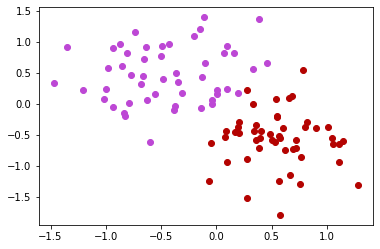

In [15]:
scatter_plot()

In [16]:
def plot_fit(title):
    plt.title = title
    w1, w2, b1 = get_params()
    x1 = np.array([-2.0, 2.0])
    # 0 = w1 * x1 + w2 * x2 + b1
    x2 = (w1 * x1 + b1) / -w2
    plt.plot(x1, x2, 'r')
    scatter_plot()

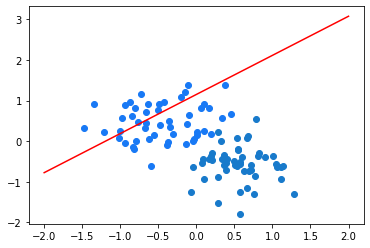

In [17]:
plot_fit('Initial Model')

# Model Training

In [18]:
X_data = torch.Tensor(X)
y_data = torch.Tensor(y).reshape(-1, 1)
print(X_data[::10])
print(y_data[::10])

tensor([[-0.1372, -0.0715],
        [-0.6259,  0.0656],
        [-0.0984,  0.6545],
        [ 0.5718, -1.2448],
        [ 0.1644,  0.8229],
        [ 0.6612,  0.0888],
        [-0.9338, -0.0454],
        [ 0.3923, -0.5443],
        [ 0.7663, -0.8594],
        [ 0.1706, -0.4479]])
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.]])


In [19]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [20]:
epochs = 1000
losses = []
termcolors = [
    'grey', 'red', 'green', 'yellow', 'blue', 'magenta', 'cyan', 'white'
]
font_colors = random.choices(termcolors, k=2)
for i in range(epochs):
    i += 1
    y_pred = model.forward(X_data)
    loss = criterion(y_pred, y_data)
    if i == 1 or i % 100 == 0:
        print(colored("epoch:", font_colors[0], attrs=['bold']), i,
              colored("loss:", font_colors[1]), loss.item())
        print(colored("weight:", font_colors[1]),
              list(model.parameters())[0][0][0].item(),
              colored("bias:", font_colors[1]),
              list(model.parameters())[1][0].item())
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch: 1 loss: 0.6185115575790405
weight: 0.16220331192016602 bias: 0.19390898942947388
epoch: 100 loss: 0.5297437906265259
weight: 0.3663676977157593 bias: 0.14645132422447205
epoch: 200 loss: 0.46398743987083435
weight: 0.544032633304596 bias: 0.10616383701562881
epoch: 300 loss: 0.4145326316356659
weight: 0.699062168598175 bias: 0.07229255139827728
epoch: 400 loss: 0.3762793242931366
weight: 0.8362248539924622 bias: 0.04353271797299385
epoch: 500 loss: 0.3459121584892273
weight: 0.9591237306594849 bias: 0.018785258755087852
epoch: 600 loss: 0.32124823331832886
weight: 1.0704656839370728 bias: -0.0028109699487686157
epoch: 700 loss: 0.3008173108100891
weight: 1.1722986698150635 bias: -0.0219130702316761
epoch: 800 loss: 0.28360408544540405
weight: 1.2661937475204468 bias: -0.03901940956711769
epoch: 900 loss: 0.26888951659202576
weight: 1.3533738851547241 bias: -0.05450921133160591
epoch: 1000 loss: 0.2561521530151367
weight: 1.4348064661026 bias: -0.06867344677448273


Text(0.5, 0, 'Epoch')

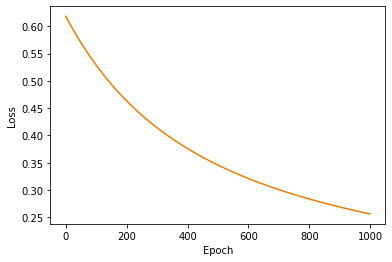

In [21]:
plt.plot(range(epochs), losses, c=np.random.rand(3))
plt.ylabel('Loss')
plt.xlabel('Epoch')

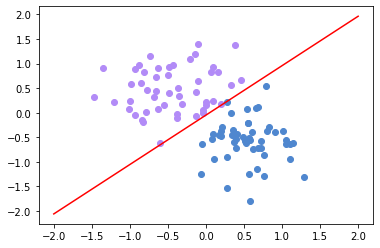

In [22]:
plot_fit("Trained Model")

# Model Testing

Red point positive probability = 0.9424158334732056
Black point positive probability = 0.05055497586727142


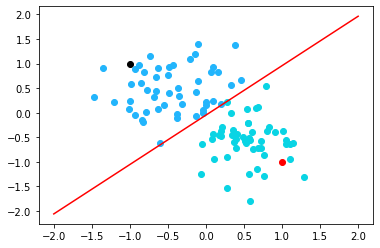

In [23]:
point1 = torch.Tensor([1.0, -1.0])
point2 = torch.Tensor([-1.0, 1.0])
plt.plot(point1.numpy()[0], point1.numpy()[1], 'ro')
plt.plot(point2.numpy()[0], point2.numpy()[1], 'ko')
print("Red point positive probability = {}".format(
    model.forward(point1).item()))
print("Black point positive probability = {}".format(
    model.forward(point2).item()))
plot_fit("Trained Model")

In [24]:
class Model(nn.Module):

    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        pred = torch.sigmoid(self.linear(x))
        return pred

    def predict(self, x):
        pred = self.forward(x)
        if pred >= 0.5:
            return 1
        else:
            return 0

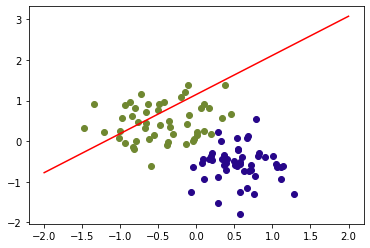

In [25]:
torch.manual_seed(2)
model = Model(2, 1)
[w, b] = model.parameters()
w1, w2 = w.view(2)
plot_fit('Initial Model')

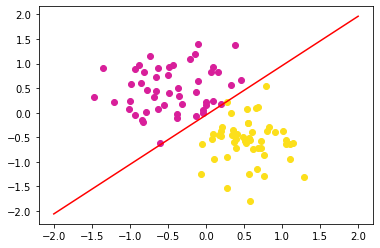

In [26]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
epochs = 1000
for i in range(epochs):
    i += 1
    y_pred = model.forward(X_data)
    loss = criterion(y_pred, y_data)
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
plot_fit("Trained Model")

Red point positive probability = 0.9424158334732056
Black point positive probability = 0.05055497586727142
Red point in class 1
Black point in class 0


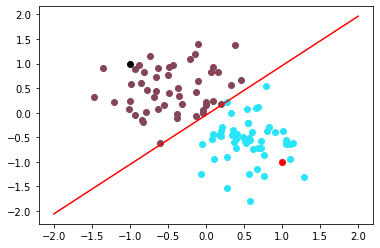

In [27]:
point1 = torch.Tensor([1.0, -1.0])
point2 = torch.Tensor([-1.0, 1.0])
plt.plot(point1.numpy()[0], point1.numpy()[1], 'ro')
plt.plot(point2.numpy()[0], point2.numpy()[1], 'ko')
print("Red point positive probability = {}".format(
    model.forward(point1).item()))
print("Black point positive probability = {}".format(
    model.forward(point2).item()))
print("Red point in class {}".format(model.predict(point1)))
print("Black point in class {}".format(model.predict(point2)))
plot_fit("Trained Model")